In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv("/Users/venkatasaiancha/Documents/sem 3/Data Science/project/layoffs.csv")

df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Karat Financial,Los Angeles,Finance,NaN,NaN,2023-10-27,Series B,United States,116.0
1,Hippo Insurance,SF Bay Area,Finance,120.0,0.2,2023-10-26,Post-IPO,United States,1300.0
2,Graphy,Bengaluru,Education,50.0,0.2,2023-10-26,Subsidiary,India,NaN
3,Salsify,Boston,Retail,110.0,NaN,2023-10-25,Unknown,United States,453.0
4,F-Secure,Helsinki,Security,70.0,NaN,2023-10-25,Post-IPO,Finland,NaN


In [24]:
df.shape

(3135, 9)

In [25]:
df.isna().sum()

company                   0
location                  1
industry                  1
total_laid_off         1040
percentage_laid_off    1101
date                      0
stage                     7
country                   0
funds_raised            326
dtype: int64

In [26]:
df['total_laid_off'].fillna(df['total_laid_off'].mean(), inplace=True)
df['percentage_laid_off'].fillna(df['percentage_laid_off'].mean(), inplace=True)
df['funds_raised'].fillna(df['funds_raised'].mean(), inplace=True)

In [27]:
df['location'].fillna(df['location'].mode()[0], inplace=True)
df['industry'].fillna(df['industry'].mode()[0], inplace=True)
df['stage'].fillna(df['stage'].mode()[0], inplace=True)

In [28]:
df.shape

(3135, 9)

In [29]:
df.isna().sum()

company                0
location               0
industry               0
total_laid_off         0
percentage_laid_off    0
date                   0
stage                  0
country                0
funds_raised           0
dtype: int64

<AxesSubplot: >

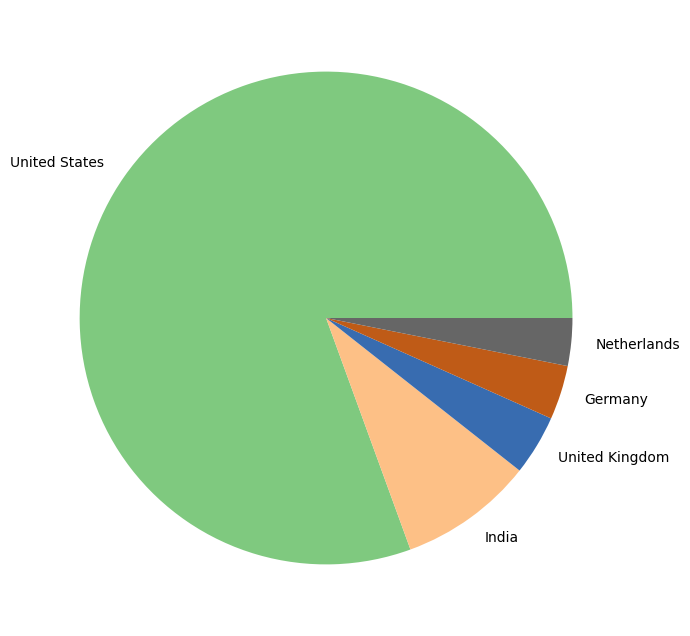

In [30]:
df.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="", figsize=(8,8), kind='pie', stacked=True, colormap='Accent')

<AxesSubplot: >

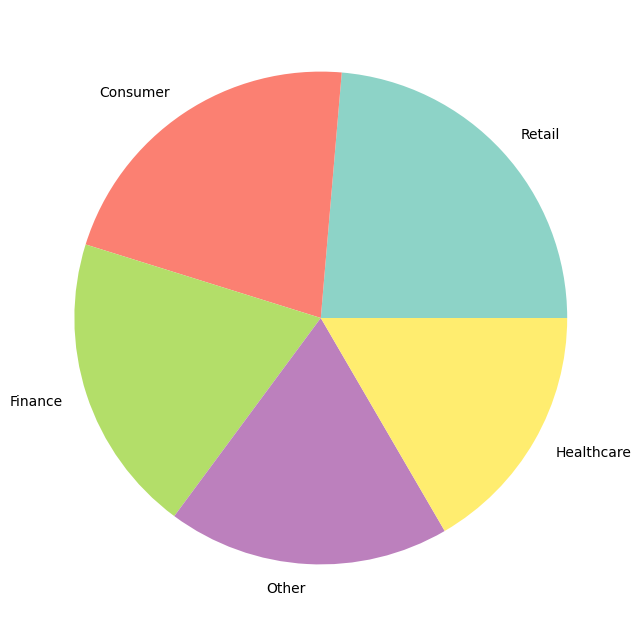

In [31]:
df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="",figsize=(8,8), kind='pie', stacked=True, colormap='Set3')

<AxesSubplot: >

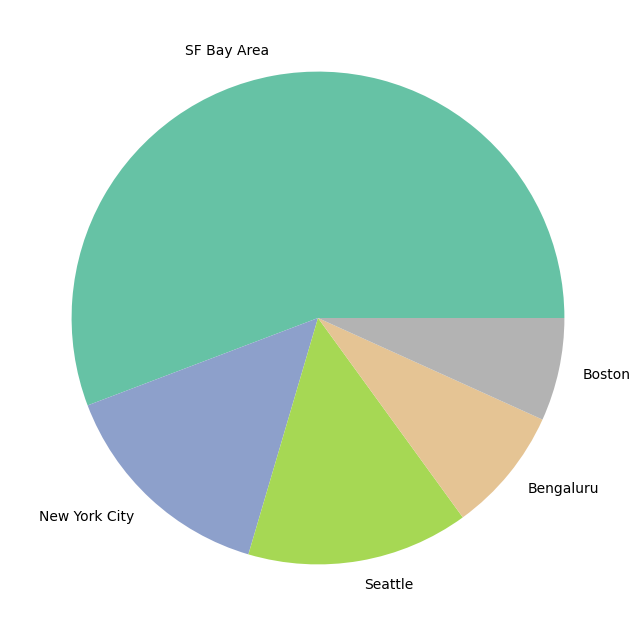

In [32]:
df.groupby('location')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="",figsize=(8,8), kind='pie', stacked=True, colormap='Set2')

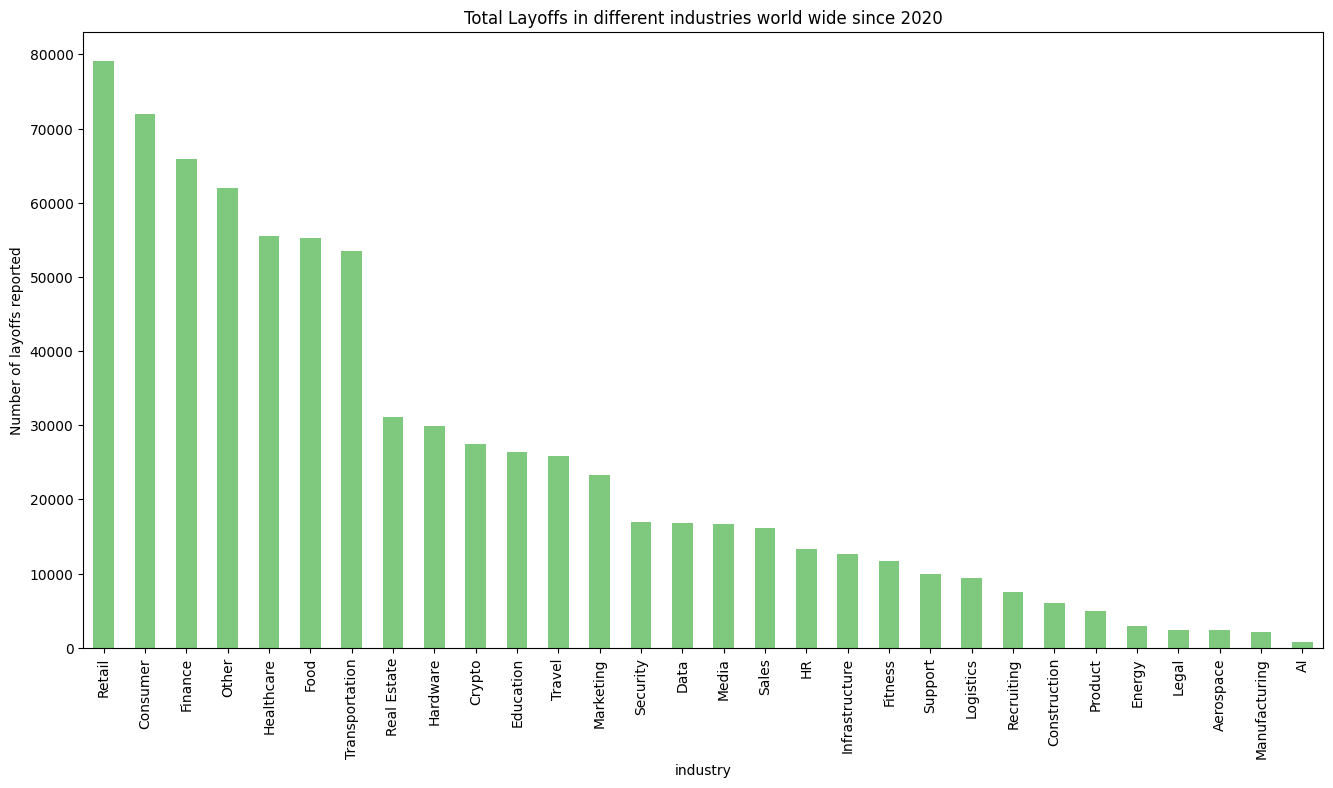

In [33]:
plt.figure(figsize=(10, 6))
plt.title("Total Layoffs in different industries world wide since 2020")
plt.ylabel("Number of layoffs reported")
df_industries = df.groupby('industry').sum()['total_laid_off'].sort_values(ascending=False).plot(figsize=(16,8), kind='bar', stacked=True, colormap='Accent')

In [34]:
df = df.set_index('date')
df_2022 = df.loc[:'2022']
df_2021 = df.loc[(df.index > '2021-01-01')&(df.index < '2022-01-01')]
df_2020 = df.loc[(df.index > '2020-01-01')&(df.index < '2021-01-01')]

In [35]:
df_2022_most_layoffs = df_2022.sort_values(by='total_laid_off', ascending=False)
df_2022_most_layoffs.head()

,company,location,industry,total_laid_off,percentage_laid_off,stage,country,funds_raised
date,,,,,,,,
2023-01-20,Google,SF Bay Area,Consumer,12000.0,0.060000,Post-IPO,United States,26.0
2022-11-09,Meta,SF Bay Area,Consumer,11000.0,0.130000,Post-IPO,United States,26000.0
2023-01-18,Microsoft,Seattle,Other,10000.0,0.050000,Post-IPO,United States,1.0
2022-11-16,Amazon,Seattle,Retail,10000.0,0.030000,Post-IPO,United States,108.0
2023-03-14,Meta,SF Bay Area,Consumer,10000.0,0.272555,Post-IPO,United States,26000.0


In [36]:
df_2021_most_layoffs = df_2021.sort_values(by='total_laid_off', ascending=False)
df_2021_most_layoffs.head()

,company,location,industry,total_laid_off,percentage_laid_off,stage,country,funds_raised
date,,,,,,,,
2021-06-01,Katerra,SF Bay Area,Construction,2434.0,1.000000,Unknown,United States,1600.0
2021-11-02,Zillow,Seattle,Real Estate,2000.0,0.250000,Post-IPO,United States,97.0
2021-01-21,Instacart,SF Bay Area,Food,1877.0,0.272555,Unknown,United States,2400.0
2021-01-06,WhiteHat Jr,Mumbai,Education,1800.0,0.272555,Acquired,India,11.0
2021-08-05,Bytedance,Shanghai,Consumer,1800.0,0.272555,Unknown,China,9400.0


In [37]:
df_2020_most_layoffs = df_2020.sort_values(by='total_laid_off', ascending=False)
df_2020_most_layoffs.head()

,company,location,industry,total_laid_off,percentage_laid_off,stage,country,funds_raised
date,,,,,,,,
2020-07-30,Booking.com,Amsterdam,Travel,4375.0,0.25,Acquired,Netherlands,769.205944
2020-05-06,Uber,SF Bay Area,Transportation,3700.0,0.14,Post-IPO,United States,24700.000000
2020-05-18,Uber,SF Bay Area,Transportation,3000.0,0.13,Post-IPO,United States,24700.000000
2020-04-13,Groupon,Chicago,Retail,2800.0,0.44,Post-IPO,United States,1400.000000
2020-05-05,Airbnb,SF Bay Area,Travel,1900.0,0.25,Private Equity,United States,5400.000000


<AxesSubplot: title={'center': '2022 layoffs by industry world wide'}, xlabel='industry', ylabel='No of layoffs'>

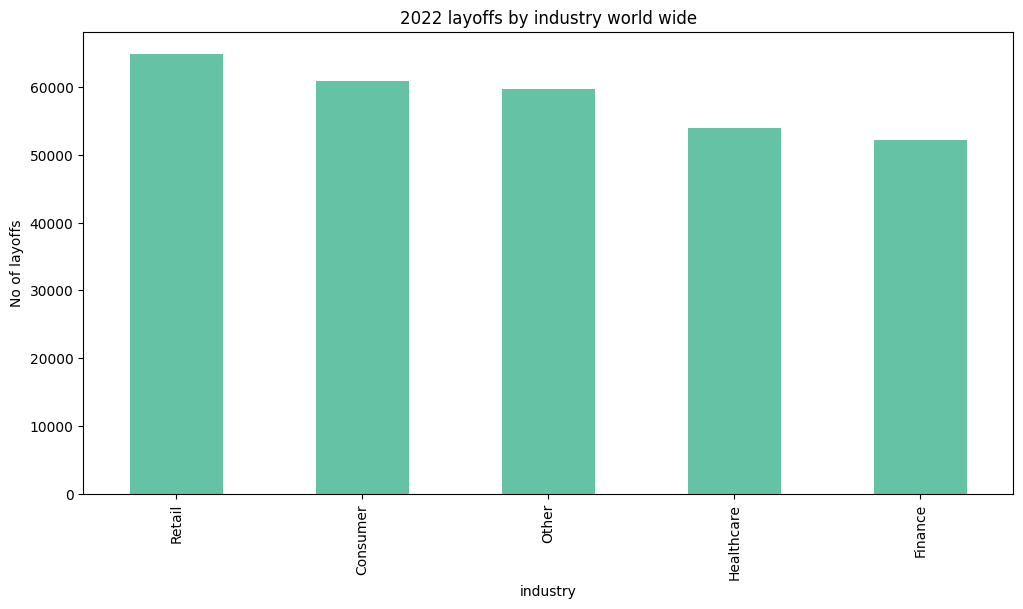

In [38]:
df_2022.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().plot(title ="2022 layoffs by industry world wide" ,ylabel="No of layoffs", figsize=(12,6), kind='bar', stacked=True, colormap='Set2')

<AxesSubplot: title={'center': '2021 layoffs by industry world wide'}, xlabel='industry', ylabel='No of layoffs'>

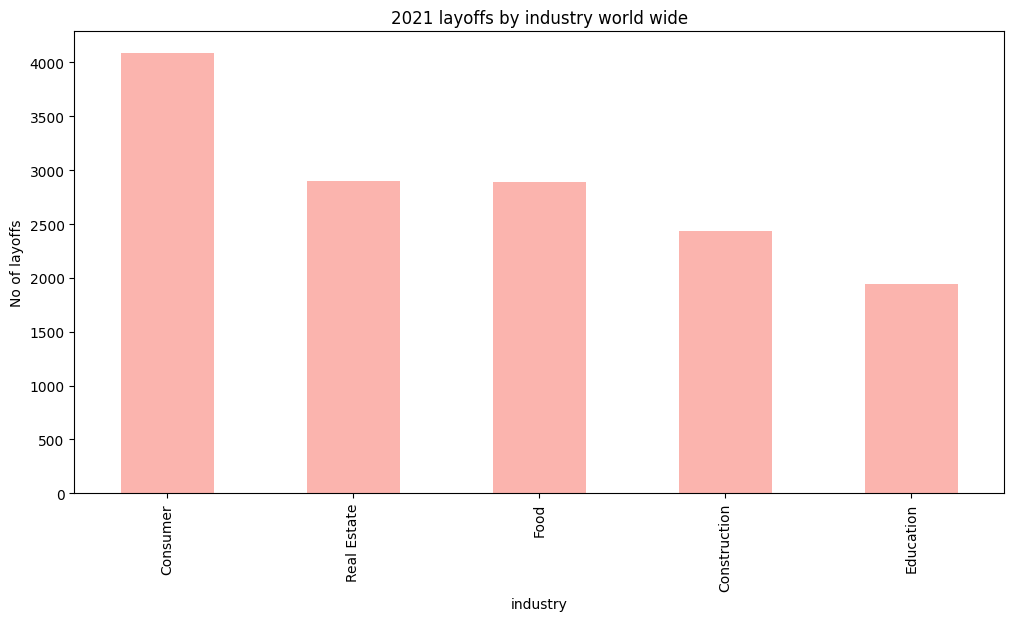

In [39]:
df_2021.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().plot(title ="2021 layoffs by industry world wide" ,ylabel="No of layoffs", figsize=(12,6), kind='bar', stacked=True, colormap='Pastel1')

<AxesSubplot: title={'center': '2020 layoffs by industry world wide'}, xlabel='industry', ylabel='No of layoffs'>

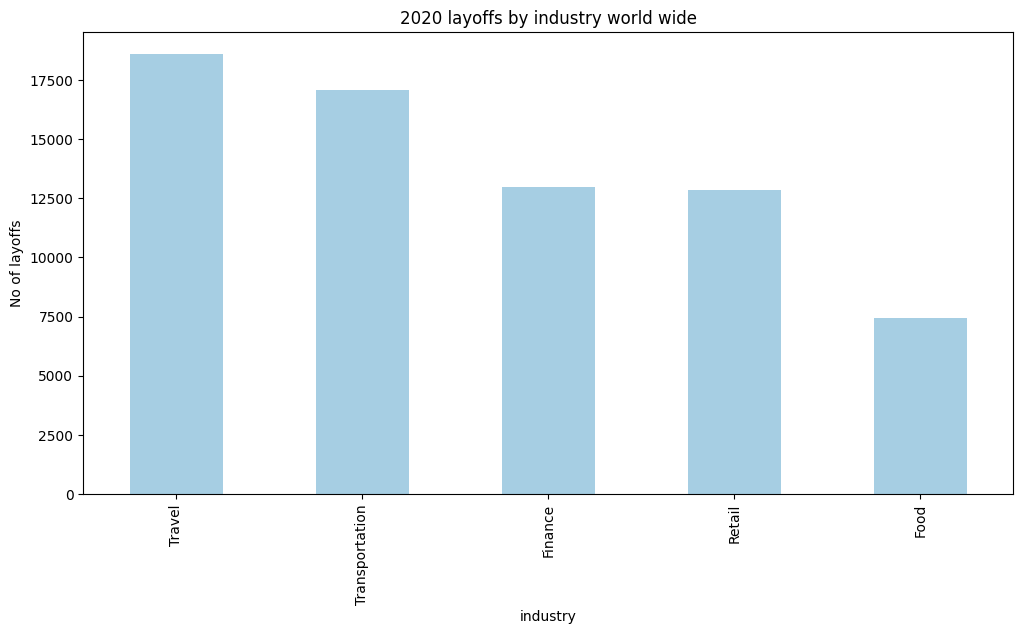

In [40]:
df_2020.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().plot(title ="2020 layoffs by industry world wide" ,ylabel="No of layoffs", figsize=(12,6), kind='bar', stacked=True, colormap='Paired')

In [41]:
df = df.reset_index()
df['date'] = pd.to_datetime(df['date'])
df_industry = df.groupby([ df.industry, df.date.dt.year]).sum()

In [43]:
df_industry = df_industry.reset_index()

<AxesSubplot: title={'center': 'Yearly layoffs in various industries world wide'}, xlabel='industry', ylabel='total_laid_off'>

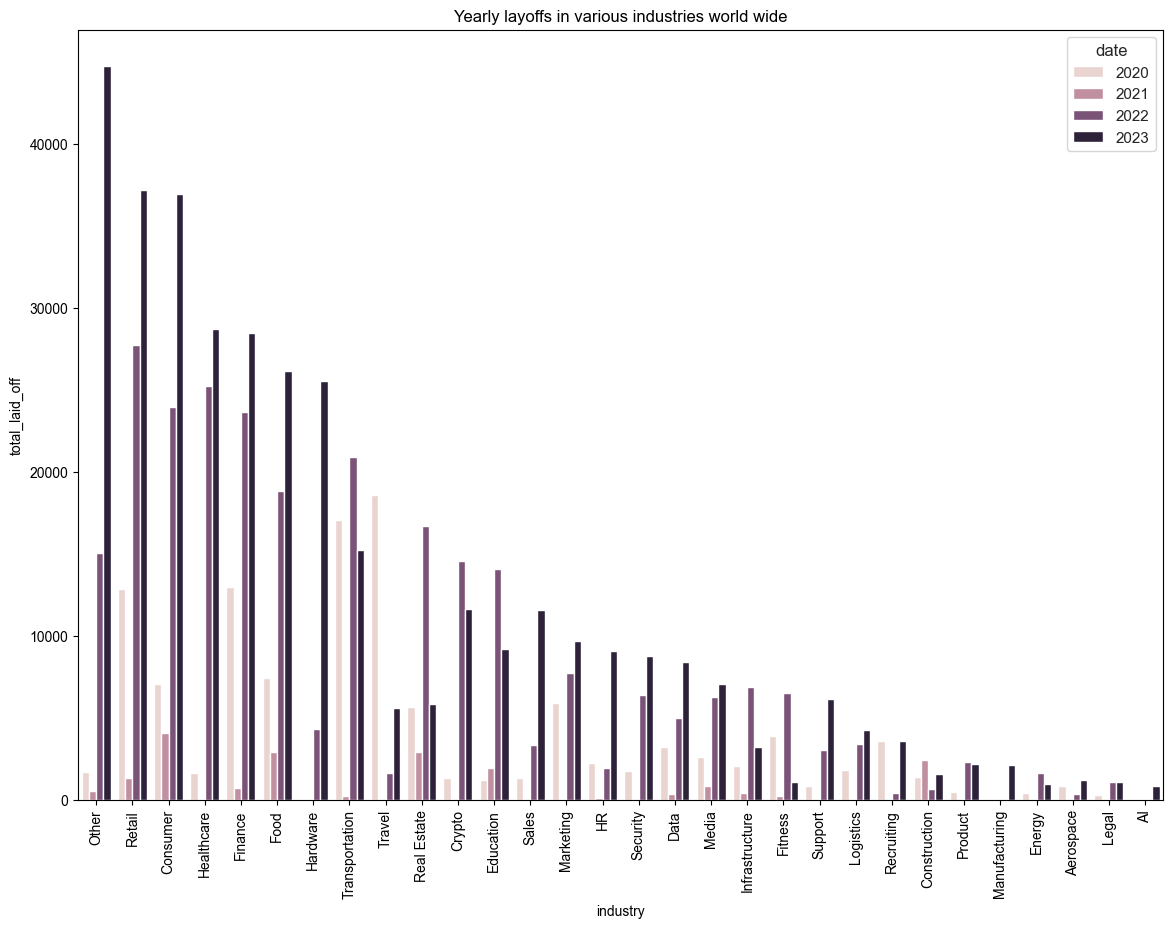

In [44]:
plt.figure(figsize=(14, 10))
plt.xticks(rotation=90)
plt.title("Yearly layoffs in various industries world wide")
sns.set(style="white", palette="Accent", color_codes=True)

sns.barplot(data=df_industry.sort_values(by=['total_laid_off','date'], ascending=False), x="industry", y="total_laid_off", hue="date")

In [45]:
df_usa = df[df['country']=="United States"]
df_minus_usa = df[df['country']!="United States"]

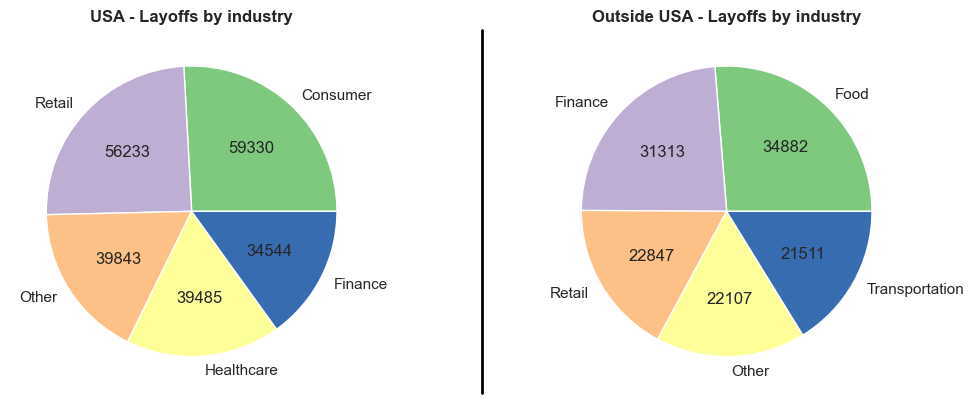

In [46]:
# isolate data to be plotted
d1 = df_usa.groupby("industry")['total_laid_off'].sum().sort_values(ascending=False).head()
d2 = df_minus_usa.groupby("industry")['total_laid_off'].sum().sort_values(ascending=False).head()

# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.tight_layout(rect=(0,0,1.3,1.2))
fig.tight_layout(rect=(0,0,1.7,0.9))

# set titles for each subplot
ax1.set_title("USA - Layoffs by industry", fontweight='bold')
ax2.set_title("Outside USA - Layoffs by industry", fontweight='bold')

# plot a pie chart for each data series
ax1.pie(x=d1,labels=d1.index, autopct=lambda x: '{:.0f}'.format(x*d1.values.sum()/100))
ax2.pie(x=d2,labels=d2.index, autopct=lambda x: '{:.0f}'.format(x*d2.values.sum()/100))

# insert line between subplots
ax1.plot([1.3, 1.3], [0, 1], color='black', lw=2, transform=ax1.transAxes, clip_on=False)

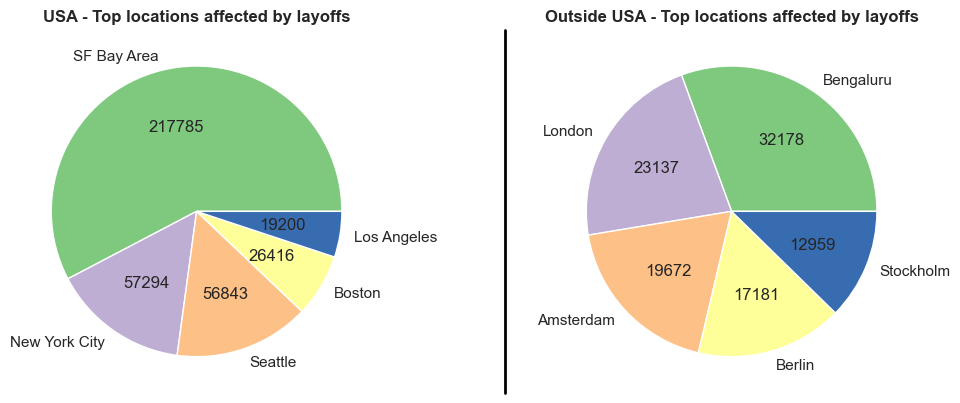

In [47]:
# isolate data to be plotted
d1 = df_usa.groupby("location")['total_laid_off'].sum().sort_values(ascending=False).head()
d2 = df_minus_usa.groupby("location")['total_laid_off'].sum().sort_values(ascending=False).head()

# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(rect=(0,0,1.7,0.9))

# set titles for each subplot
ax1.set_title("USA - Top locations affected by layoffs", fontweight='bold')
ax2.set_title("Outside USA - Top locations affected by layoffs", fontweight='bold')

# plot a pie chart for each data series
ax1.pie(x=d1,labels=d1.index, autopct=lambda x: '{:.0f}'.format(x*d1.values.sum()/100))
ax2.pie(x=d2,labels=d2.index, autopct=lambda x: '{:.0f}'.format(x*d2.values.sum()/100))

# insert line between subplots
ax1.plot([1.35, 1.35], [0, 1], color='black', lw=2, transform=ax1.transAxes, clip_on=False)

In [48]:
df_usa_industry_yearly = df_usa.groupby([ df_usa.industry, df_usa.date.dt.year]).sum()

In [49]:
df_usa_industry_yearly = df_usa_industry_yearly.reset_index()

<AxesSubplot: title={'center': 'USA - Yearly layoffs in various industries'}, xlabel='industry', ylabel='total_laid_off'>

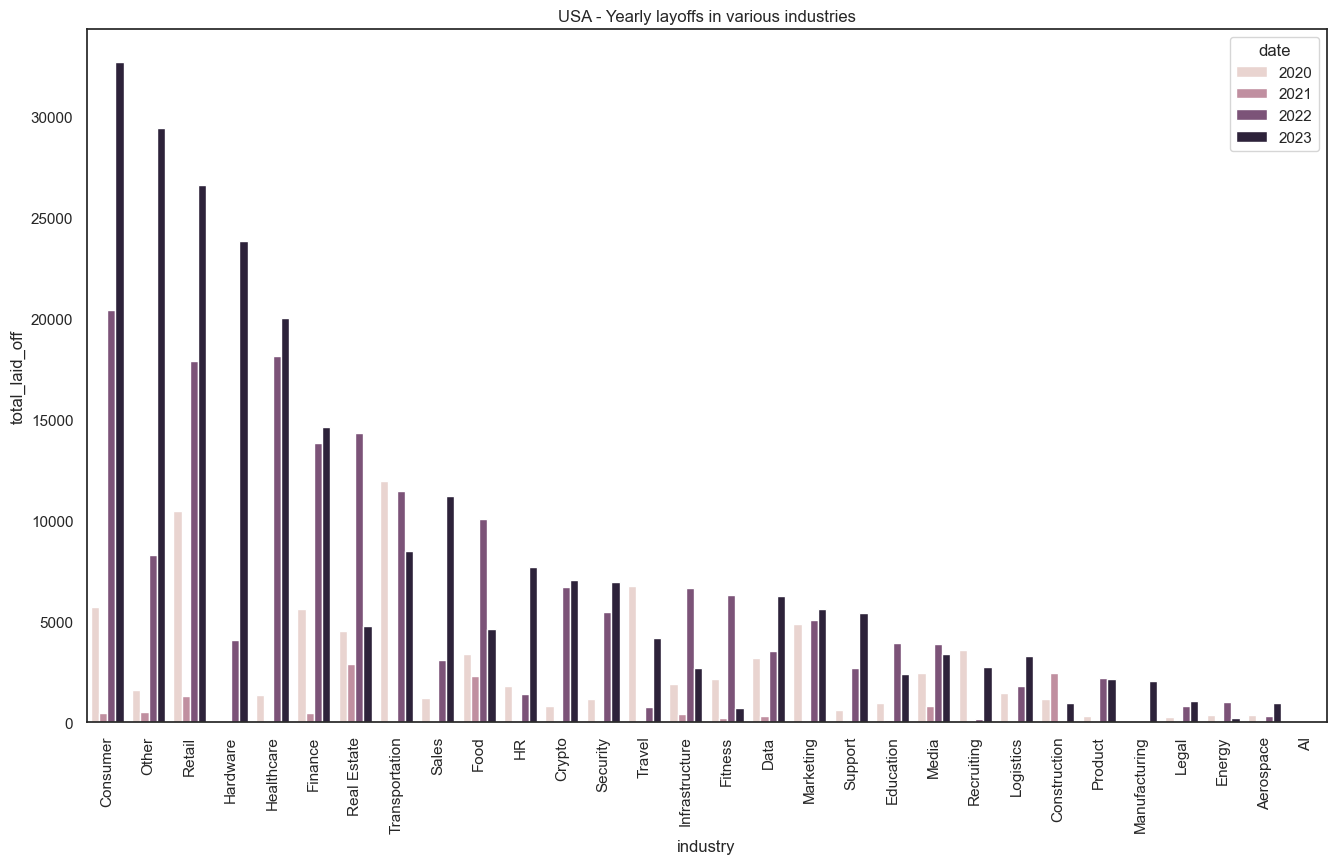

In [50]:
plt.figure(figsize=(16, 9))
plt.xticks(rotation=90)
plt.title("USA - Yearly layoffs in various industries")
sns.set(style="white", palette="Accent", color_codes=True)

sns.barplot(data=df_usa_industry_yearly.sort_values(by=['total_laid_off','date'], ascending=False), x="industry", y="total_laid_off", hue="date")

In [51]:
df_minus_usa_industry_yearly = df_minus_usa.groupby([ df_minus_usa.industry, df_minus_usa.date.dt.year]).sum()

In [52]:
df_minus_usa_industry_yearly = df_minus_usa_industry_yearly.reset_index()

<AxesSubplot: title={'center': 'Outside USA - Yearly layoffs in various industries'}, xlabel='industry', ylabel='total_laid_off'>

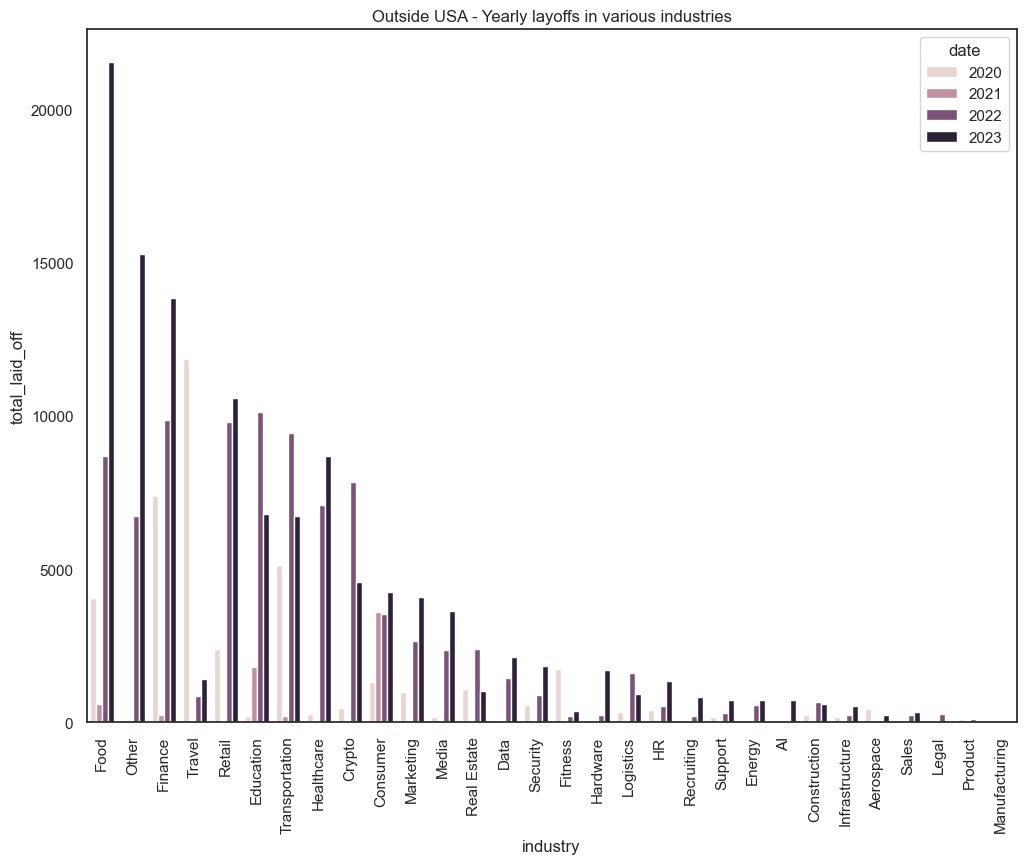

In [53]:
plt.figure(figsize=(12, 9))
plt.xticks(rotation=90)
plt.title("Outside USA - Yearly layoffs in various industries")
sns.set(style="white", palette="Accent", color_codes=True)

sns.barplot(data=df_minus_usa_industry_yearly.sort_values(by=['total_laid_off','date'], ascending=False), x="industry", y="total_laid_off", hue="date")

In [54]:
df_minus_usa[df_minus_usa['industry']=='Education'].groupby('country').sum()['total_laid_off'].sort_values(ascending=False).head()

country
India        15252.885442
Canada        1096.777088
Indonesia      684.777088
Brazil         319.000000
Austria        300.000000
Name: total_laid_off, dtype: float64

In [55]:
perc = int(100*(df_minus_usa[(df_minus_usa['industry']=='Education') & (df_minus_usa['country']=='India')].sum()['total_laid_off'])/(df_minus_usa[(df_minus_usa['industry']=='Education')].sum()['total_laid_off']))

print("Percent of layoffs by India in Education Industry = ", perc, "%")

Percent of layoffs by India in Education Industry =  80 %


In [56]:
df_india = df[df['country']=='India']
df_india_industry_yearly = df_india.groupby([ df_india.industry, df_india.date.dt.year]).sum()
df_india_industry_yearly = df_india_industry_yearly.reset_index()

<AxesSubplot: title={'center': 'India - Yearly layoffs in various industries'}, xlabel='industry', ylabel='total_laid_off'>

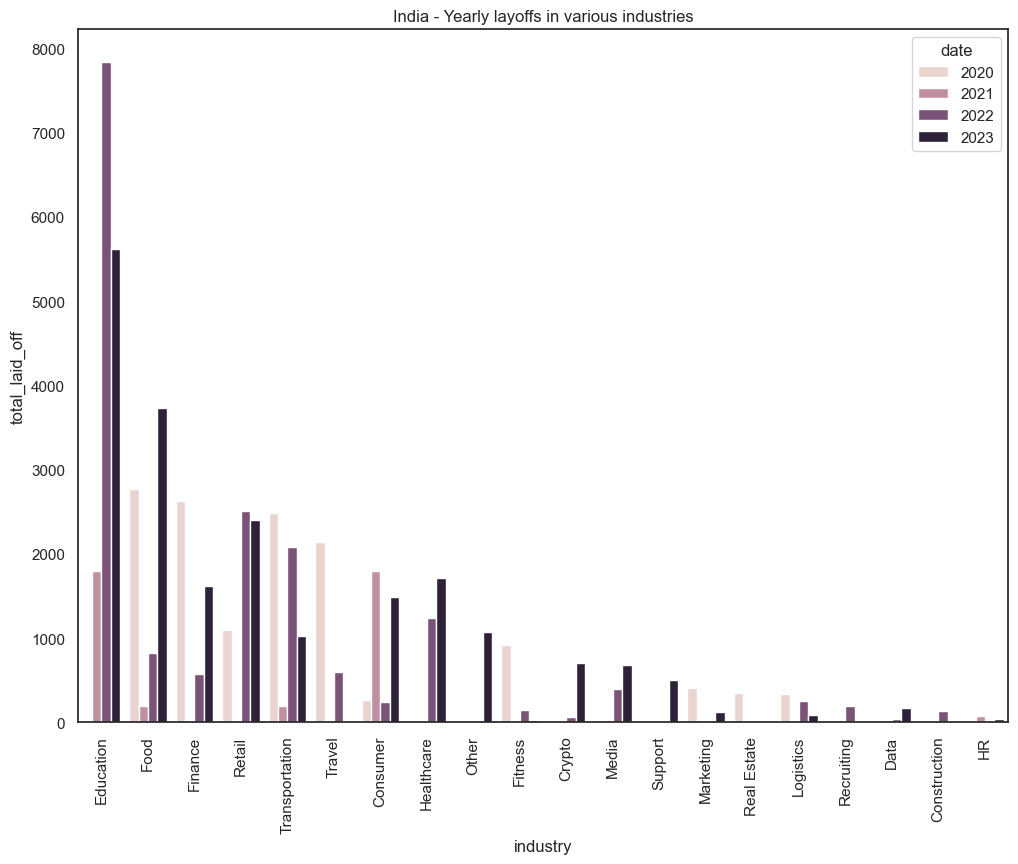

In [57]:
plt.figure(figsize=(12, 9))
plt.xticks(rotation=90)
plt.title("India - Yearly layoffs in various industries")
sns.set(style="white", palette="Accent", color_codes=True)
sns.barplot(data=df_india_industry_yearly.sort_values(by=['total_laid_off','date'], ascending=False), x="industry", y="total_laid_off", hue="date")

In [58]:
df_minus_usa_india = df_minus_usa[df_minus_usa['country']!='India']
df_minus_usa_india_industry_yearly = df_minus_usa_india.groupby([ df_minus_usa_india.industry, df_minus_usa_india.date.dt.year]).sum()
df_minus_usa_india_industry_yearly = df_minus_usa_india_industry_yearly.reset_index()

<AxesSubplot: title={'center': 'World excluding USA & India - Yearly layoffs in various industries'}, xlabel='industry', ylabel='total_laid_off'>

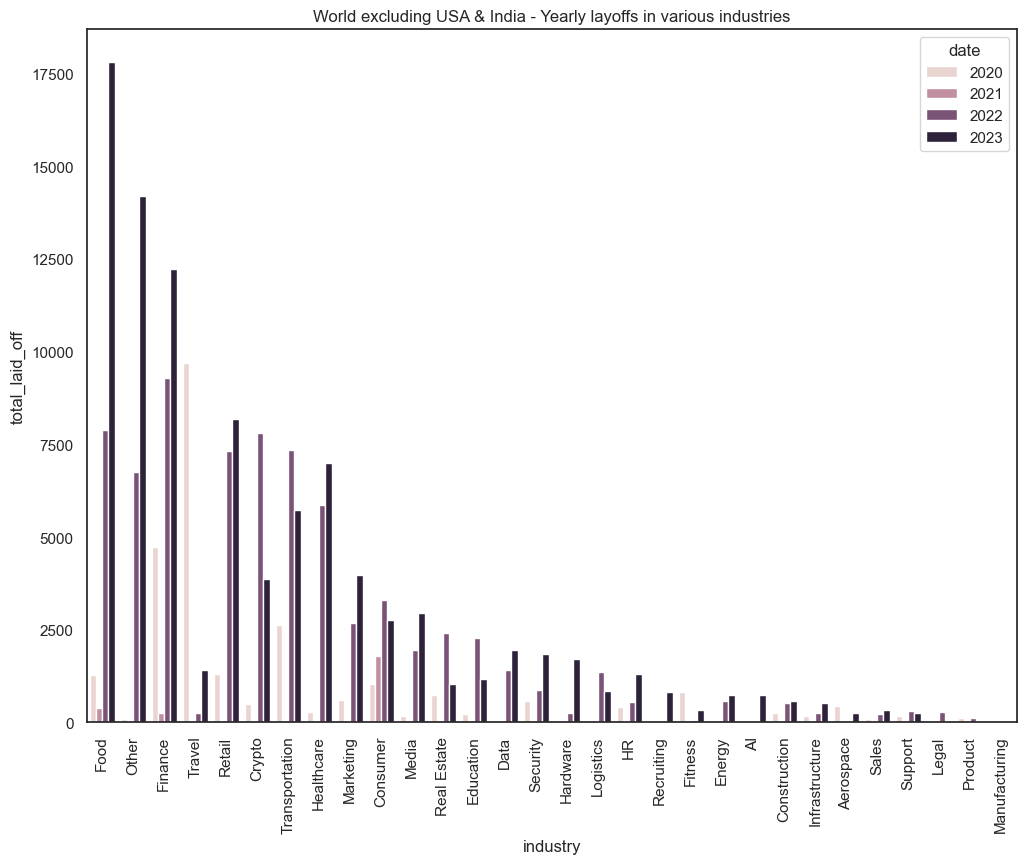

In [59]:
plt.figure(figsize=(12, 9))
plt.xticks(rotation=90)
plt.title("World excluding USA & India - Yearly layoffs in various industries")
sns.set(style="white", palette="Accent", color_codes=True)

sns.barplot(data=df_minus_usa_india_industry_yearly.sort_values(by=['total_laid_off','date'], ascending=False), x="industry", y="total_laid_off", hue="date")

In [62]:
df.head()

,date,company,location,industry,total_laid_off,percentage_laid_off,stage,country,funds_raised
0,2023-10-27,Karat Financial,Los Angeles,Finance,242.388544,0.272555,Series B,United States,116.000000
1,2023-10-26,Hippo Insurance,SF Bay Area,Finance,120.000000,0.200000,Post-IPO,United States,1300.000000
2,2023-10-26,Graphy,Bengaluru,Education,50.000000,0.200000,Subsidiary,India,769.205944
3,2023-10-25,Salsify,Boston,Retail,110.000000,0.272555,Unknown,United States,453.000000
4,2023-10-25,F-Secure,Helsinki,Security,70.000000,0.272555,Post-IPO,Finland,769.205944


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3135 entries, 0 to 3134
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 3135 non-null   datetime64[ns]
 1   company              3135 non-null   object        
 2   location             3135 non-null   object        
 3   industry             3135 non-null   object        
 4   total_laid_off       3135 non-null   float64       
 5   percentage_laid_off  3135 non-null   float64       
 6   stage                3135 non-null   object        
 7   country              3135 non-null   object        
 8   funds_raised         3135 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 220.6+ KB


In [64]:
df['total_laid_off'] = df['total_laid_off'].astype(int)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3135 entries, 0 to 3134
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 3135 non-null   datetime64[ns]
 1   company              3135 non-null   object        
 2   location             3135 non-null   object        
 3   industry             3135 non-null   object        
 4   total_laid_off       3135 non-null   int64         
 5   percentage_laid_off  3135 non-null   float64       
 6   stage                3135 non-null   object        
 7   country              3135 non-null   object        
 8   funds_raised         3135 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 220.6+ KB


In [67]:
df.isnull().sum()

date                   0
company                0
location               0
industry               0
total_laid_off         0
percentage_laid_off    0
stage                  0
country                0
funds_raised           0
dtype: int64

In [73]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['location'] = label_encoder.fit_transform(df['location'])
df['company'] = label_encoder.fit_transform(df['company'])
df['industry'] = label_encoder.fit_transform(df['industry'])
df['stage'] = label_encoder.fit_transform(df['stage'])
df['country'] = label_encoder.fit_transform(df['country'])

In [74]:
df

,date,company,location,industry,total_laid_off,percentage_laid_off,stage,country,funds_raised
0,2023-10-27,1087,120,8,242,0.272555,5,60,116.000000
1,2023-10-26,942,176,8,120,0.200000,1,60,1300.000000
2,2023-10-26,887,18,6,50,0.200000,14,23,769.205944
3,2023-10-25,1747,25,24,110,0.272555,15,60,453.000000
4,2023-10-25,1,84,26,70,0.272555,1,16,769.205944
...,...,...,...,...,...,...,...,...,...
3130,2020-03-16,1787,120,29,242,1.000000,3,60,5.100000
3131,2020-03-13,961,120,28,8,0.100000,15,60,45.000000
3132,2020-03-13,1484,176,3,6,0.750000,3,60,1.000000
3133,2020-03-12,1976,120,24,20,0.400000,6,60,90.000000


In [84]:
columns_to_drop = ['country', 'date']
X = df.drop(columns_to_drop, axis =1)
y = df['country']
print(X.shape)
print(y.shape)

(3135, 7)
(3135,)


In [85]:
X.head()

,company,location,industry,total_laid_off,percentage_laid_off,stage,funds_raised
0,1087,120,8,242,0.272555,5,116.000000
1,942,176,8,120,0.200000,1,1300.000000
2,887,18,6,50,0.200000,14,769.205944
3,1747,25,24,110,0.272555,15,453.000000
4,1,84,26,70,0.272555,1,769.205944


In [86]:
y.head()

0    60
1    60
2    23
3    60
4    16
Name: country, dtype: int64

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2508, 7)
(627, 7)
(2508,)
(627,)


In [89]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [90]:
y_pred=dt.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [96]:
print("decision tree accuracy is: {:.2f}".format(accuracy_score(y_test, y_pred)*100))

decision tree accuracy is: 92.98


In [93]:
bag = BaggingClassifier(n_estimators=100)
bag.fit(X_train, y_train)

BaggingClassifier(n_estimators=100)

In [94]:
y_pred_bag = bag.predict(X_test)

In [95]:
print("Bagging accuracy score:{:.2f}".format(accuracy_score(y_test, y_pred_bag)*100))

Bagging accuracy score:94.58


In [97]:
rand = RandomForestClassifier()
rand.fit(X_train, y_train)

RandomForestClassifier()

In [98]:
y_pred_rand = rand.predict(X_test)

In [99]:
print("random forest accuracy is: {:.2f}". format(accuracy_score(y_test, y_pred_rand)*100))

random forest accuracy is: 80.70


In [100]:
print("decision tree accuracy is: {:.2f}".format(accuracy_score(y_test, y_pred)*100))
print("Bagging accuracy score:{:.2f}".format(accuracy_score(y_test, y_pred_bag)*100))
print("random forest accuracy is: {:.2f}". format(accuracy_score(y_test, y_pred_rand)*100))

decision tree accuracy is: 92.98
Bagging accuracy score:94.58
random forest accuracy is: 80.70
